# 1. Data EDA
### 이 과정에서는 Data의 특성을 파악하고 얼만큼의 Data를 사용할 것인지 파악할 것이다
- 예를 들어 토큰화 이후 Data별 Len을 확인하였을 때 적절한 len을 찾는 것이 목표이다.

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기

train_2_3sent = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data/csv/train_2-3sent_Sum2.csv')
train_20sent = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data/csv/train_20per_Sum3.csv')
train_1sent = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data/csv/train_Sum1.csv')
val_2_3sent = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data/csv/val_2-3sent_Sum2.csv')
val_20sent = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data/csv/val_20per_Sum3.csv')
val_1sent = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data/csv/val_Sum1.csv')

In [ ]:
# 데이터 별 길이
# 현재 train, val의 길이가 동일한 것으로 나오는데 데이터 추출에서 문제가 발생한 것으로 예측됨.
print('train 2-3sen : ',len(train_2_3sent))
print('val 2-3sen : ',len(val_2_3sent))
print('train 20%sen : ',len(train_20sent))
print('val 20%sen : ',len(val_20sent))
print('train 1sen : ',len(train_1sent))
print('val 1sen : ',len(val_1sent))

train 2-3sen :  61290
val 2-3sen :  61290
train 20%sen :  73431
val 20%sen :  73431
train 1sen :  125690
val 1sen :  125690


In [ ]:
train_2_3sent.head()

In [ ]:
train_2_3sent['sentence_sent_2~3'][0]

In [ ]:
train_2_3sent['input'][0]

In [ ]:
train_1sent.head()

In [ ]:
train_1sent['input'][0]

In [ ]:
train_1sent['sentence_onesent'][0]

In [ ]:
train_20sent.head()

In [ ]:
train_20sent.tail(10)

In [ ]:
train_20sent['sentence_per_20'][0]

In [ ]:
val_20sent.head()

In [ ]:
val_20sent.tail(10)

In [ ]:
val_20sent['sentence_per_20'][0]

In [ ]:
val_2_3sent.head()

In [ ]:
val_2_3sent['sentence_sent_2~3'][0]

In [ ]:
val_1sent.head()

In [ ]:
val_1sent['sentence_onesent'][0]

In [ ]:
a = train_2_3sent['input'] == val_2_3sent['input']

In [ ]:
a.value_counts()  # 

True    61290
Name: input, dtype: int64

In [ ]:
b = train_2_3sent['sentence_sent_2~3'] == val_2_3sent['sentence_sent_2~3b']

In [ ]:
b.value_counts()

True    61290
Name: sentence_sent_2~3, dtype: int64

# 데이터 전처리 시행
- pandas를 사용하여 Data의 특징을 알아보고 필요한 전처리를 수행한다.
- 임시적으로 train Data에서만 전처리를 적용하였다.

In [ ]:
train_2_3sent 
train_20sent 
train_1sent 

In [ ]:
# 이메일이 포함된 문장 개수 확인 (1줄 요약)

train_1sent[train_1sent['input'].str.contains('@')]


In [ ]:
# 임의로 확인

train_1sent['input'].iloc[96024]

# 기자의 이메일 뿐 아니라 인터넷 웹사이트가 눈에띈다
# 이럴때는 ()안에 모든 문자를 지울수도있지만 중요한 정보가 있을 가능성을 배제할 수 없으니 
# 사이트 주소와 이메일만 지우도록 하겠다.

' 환경부 소속 화학물질안전원(원장 조은희)은 화학안전 관련 아이디어 발굴 및 국민 체감형 화학안전 정책 추진을 위해 ‘2021 대국민 화학안전 아이디어 공모전’을 7월 1일부터 31일까지 한 달간 개최한다. \n 이번 공모전은 ‘국민의 아이디어, 정책이 되다’를 주제로 화학안전 정책 수립 단계부터 국민 참여를 활성화 하고 국민 목소리를 정책에 적극적으로 반영하기 위해 마련됐다.\n 공모 분야는 화학안전망 강화 탄소저감 실현 신기술 활용 국민 참여‧소통 확대 등 정부의 핵심 추진정책 및 국민적 관심이 높은 4개 분야다.\n  화학안전에 관심 있는 국민 및 국내 거주 외국인 등 누구나 참여 가능하며, \n  응모자는 화학물질안전원 누리집(www.nics.me.go.kr) 및 국민생각함(epeople.go.kr)에서 아이디어 공모전 신청서를 내려받아 작성한 후 전자메일(jojo721@korea.kr)로 제출하면 된다.\n 화학물질안전원은 8월 중 대상을 포함한 총 5건의 우수 아이디어를 선정할 계획이다.\n  심사는 창의성, 실현가능성, 구체성, 기대효과를 종합적으로 고려하여 정보가림방식(블라인드 심사)으로 진행되며, 1단계는 화학물질안전원 직원과 국민투표로, 2단계는 내부 심사위원회의를 거칠 예정이다.\n  시상내역으로는 대상 1명, 최우수상 1명, 우수상 3명 이며, 선발된 수상자에게는 소정의 상금과 화학물질안전원상이 수여될 예정이다.\n  선정된 아이디어는 향후 화학사고 예방‧대비‧대응 관련 정책 마련, 화학물질 사업장 저탄소‧친환경 공정 개선 및 신기술을 활용한 화학안전 정책 추진 등에 적극 활용될 예정이다.\n'

In [ ]:
train_1sent[train_1sent['input'].str.contains(r' 기자')]

,input,sentence_onesent
59,특별히 65세 이상 되신 어르신 그리고 고위험군들은 만성질환을 앓고 계실 경우 약 ...,집단방역을 위해서 5대 기본수칙을 철저히 지켜야 하고 일상을 영위해가며 생활 속의 ...
75,"예, 질의하신 사항에 대해 답변드리겠습니다. 먼저, 최근에 등교학생들, 등교수업이...",정부는 덴탈마스크의 생산량 증대를 위해 대책과 방안을 추진하고 하루 생산량의 80%...
171,"답변드리겠습니다. 기자님께서 질문하신 사항은 두 가지인데, 첫 번째는 최근에 수도권...",대구·경북지역이 전염병관리특별지역이기에 마스크 특별공급도 추진해 왔고 수도권 지역에...
182,"(은성수 금융위원장) 규모를 속 시원하게 이야기하면 좋겠습니다마는, 규모는 아까 말...",채권시장안정펀드의 규모는 2008년에 부총리가 10조를 말했는데 그보다는 커질 것 ...
203,신 기자께서는 교육업에 대해서도 특별고용지원 업종 지정을 고려하실 계획이 있으신지를...,코로나19 사태로 피해가 크게 나타나는 업종을 특별고용지원 업종으로 지정했는데 지속...
...,...,...
125387,\n최거훈 비서실장 기자간담회 발언자료\n 김형오 국회의장에게 미디어법 시정의무가...,민주당 의원들은 미디어법이 유효하게 시행되는 것을 막기 위해 헌재에 권한쟁의심판을 ...
125393,김형오 국회의장 '우리땅 희망탐방' : 경남편\n 국회의장으로 45년 만에 해군사관...,김 국회의장은 우리 땅 희망탐방 다섯번째 일정으로 경남지역을 방문했고 해군사관학교를...
125493,"\n정의화 의장, 신임 국회사무총장에 박형준 전 의원 내정\n정의화 의장은 신임 ...",신임 국회 사무총장에 박 전 의원을 내정한 정 의장은 의장으로서 국회의 혁신적 변화...
125498,이에 대해 조코위 대통령은 배석한 인니 외교부장관으로부터 MIKTA 관련 진행 현황...,정 의장이 줄키프리 의장에게 서울에서 MIKTA 국회의장 회의 개최를 추진 중에 있...


In [ ]:
train_1sent['input'].iloc[203]

'신 기자께서는 교육업에 대해서도 특별고용지원 업종 지정을 고려하실 계획이 있으신지를 질문하셨습니다.  <답변> 이번에 특별고용지원 업종으로 네 업종을 지정하게 된 것은 지금 코로나19 상황, 사태로 인해서 피해가 직접적으로 아주 크게 나타나고 있는 업종을 저희가 선정했고, 또 이런 업종의 경우에는 코로나19 상황이 안정화된다 하더라도 업황이 개선되는 데 상당한 시간이 걸릴 것으로 보여지는 그런 업종을 선택했다는 말씀을 드리겠습니다.  그러면서 저희가 이번에 지정을 하면서 지금 6개월로 사실은 지정을 했습니다. 6개월로 지정한 것은 과거의 메르스나 이런 상황을 봤을 때 대개 그것이 지속되는 기간을 저희가 감안해서 6개월로 지정은 하였습니다. 다만, 이것은 상황에 따라서 그 부분은 추가 연장을 할 것인지 아닌지는 그때의 상황을 보면서 더 판단하도록 하겠습니다.  원래 저희가 업종 지정을 착수했을 때하고 지금은, 또 유럽이나 이런 데 코로나19 바이러스가 확산되고 있기 때문에 상황이 어떻게 전개될 지는 상당히 유동적인 것 같습니다. 그래서 이 사항은 좀 더 저희가 살펴보면서 검토하겠다는 말씀드리겠습니다.  교육업종의 경우에는, 이게 교육부나 아니면 교육청의 학원들에 대한 휴업을 강하게 권고하면서 나타나는 현상이라고 저희는 생각하고 있습니다. 그래서 지금 당장은 휴업을 하면서... 휴원 때문에 어려움이 발생하고 있습니다만, 이 상황은 사실은 휴원, 그러니까 개학조치가 이뤄지면 바로 해소가 될 것이기 때문에 좀 우리가 오늘 지정한 네 업종하고는 상황이 다르다고 저희는 생각하고 있습니다.'

In [ ]:
train_1sent.sample(10)

,input,sentence_onesent
26193,"이후 금종해 대한수학회장의 진행으로 열린 토론에서는, 깊이있는 사고력으로 사회문제...",금 대한수학회장의 진행으로 열린 토론회는 창의적 인재 양성을 위한 다양한 방안이 논...
92493,올 여름 해파리 피해 미리 막는다\n 인천‧경기‧충남 권역에서 보름달물해파리 부착유...,바닷물 온도 상승과 연안 개발 등으로 번식력이 강한 해파리의 대량 출현으로 어업인들...
11795,"중대본이나 중수본 차원에서 클럽 등에 대해서 휴업을 요청한 적은 없습니다. 다만, ...",중대본은 클럽 등은 고위험시설들이기 때문에 핵심방역수칙 이행을 권고하고 있으며 서울...
14768,고민정 더불어민주당은 청와대 부대변인이던 2018년 5월 한 방송에 출연해 문재인 ...,문 대통령이 SNS 메세지를 전적으로 직접 쓰는 경우는 거의 없으며 관련 수석실이나...
66661,"예방접종 후 이상반응으로 의심되어 신고된 사례는 모두 2,883건입니다. 이 중 2...",코로나19 예방접종 후 이상반응으로 의심되어 신고된 사례 2883건 중 2849건은...
13497,미·중·러 격돌하는 로봇군대소니 픽처스의 SF 영화 ‘채피’(2015년)에서 스카우...,"미국과 러시아, 중국이 AI를 장착한 자율형 전투로봇 개발에 나선 가운데 미 국방부..."
110526,"원자력안전위원장 이은철] ""예.""\n배덕광 위원] ""원안위에서 생산되는 문서 특히 ...",배 위원이 요구한 자료를 조속한 시일 내에 제출할 것을 요구하자 이 위원장은 있으면...
79336,오거돈 부산시장이 미투 사건으로 시장직에서 사퇴했다.\n 오 시장은 23일 오전 ...,미투 사건으로 사퇴한 오 부산시장은 기자회견을 열고 경중을 떠나 어떤 말과 행동으로...
88134,환경부 산하 한국환경공단(이사장 장준영)은 공공환경시설의 체계적인 악취관리를 위해...,한국환경공단은 악취발생의 현황과 개선 방안 등을 담은 공공환경시설 악취기술진단 사례...
32758,"이 건물은 1928년에 경성재판소로 건립된 법원 건물로, 광복 후 대법원 청사로 사...",경성재판소로 만들어진 이 건물은 현재 서울시립미술관으로 사용되고 있으며 전면 현관 ...


In [ ]:
 train_2_3sent[train_2_3sent['input'].str.contains('@')]  

,input,sentence_sent_2~3
13104,호스피스 간호사가 전하는 말에 의하면 사람은 살아온 대로 죽는다고 한다.\n 그...,직장에서 열심히 일하고 자녀를 양육하며 전반생을 마친 세대에게 다행히 후반생에서 다...
13162,더불어민주당 8·29 전국대의원대회(전당대회)는 사상 초유의 ‘언택트(untact·...,더불어민주당 8·29 전국대의원대회(전당대회)는 사상 초유의 ‘언택트(untact·...
13264,"애플 창업자인 스티브 잡스 당시 CEO는 ""개발자 카드 수수료나 앱 호스팅 비용,...",구글은 당초 모바일 게임에만 적용하던 인앱 결제 정책을 웹툰·웹소설 등 각종 디지털...
13426,그의 개성 강한 얼굴은 각도를 조금 바꾸는 것만으로 인상이 돌변한다.\n 덩달아...,리 워넬 감독은 “엘리자베스 모스는 진실성이란 측면에서 우리 영화의 검열관이기도 했...
13609,"일요일 매출만 한달의 18% 작은 법인을 세워 스타필드 하남과 서울 센트럴시티, ...","일요일 매출만 한달의 18% 작은 법인을 세워 스타필드 하남과 서울 센트럴시티, 대..."
...,...,...
58674,‘최순실 태블릿PC’의 폰 정보에는 zixi9876@gmail.com과 great...,‘최순실 태블릿PC’의 폰 정보에는 zixi9876@gmail.com과 greatp...
59675,"요 약 \n연세대학교 미래정부연구센터(센터장, 문명재)와 국회미래연구원(원장, 朴進...","연세대학교 미래정부연구센터(센터장, 문명재)와 국회미래연구원(원장, 朴進)은 2월 ..."
59683,"국회미래연구원 연구위원 김홍범\n(0222249803, hbkimim@nafi.re...","EPTA는 과학기술의 발달이 사회에 미치는 영향을 사전에 예측하고 대응함으로써, 긍..."
60578,\n국회 온라인미디어 국회ON은 11월 2일(월)부터 30일(월)까지 국민과 함께...,‘퀴즈 어셈블리’ 이벤트는 국회ON 홈페이지(www.naon.go.kr)에 접속해 ...


In [ ]:
train_1sent['input'].iloc[59683]

'국회미래연구원 연구위원 김홍범\n(0222249803, hbkimim@nafi.re.kr)\n 2019년 10월 23일 조간 보도를 부탁드립니다.\n국회미래연구원(원장, 朴進)은 지난 10월 1011일 양일에 걸쳐, 스웨덴 스톡홀름에서 개최된 EPTA 회원국 회의에서, EPTA(European Parliamentary Technology Assessment)의 국제 네트워크에 Associate Membership을 확보하는 데 성공하였다. 회원국들만의 비공개 회의에서 회원으로서의 전제 조건인 국회 지원기관의 역할, 독립적 연구 수행, 독립 예산, 기술영향평가 수행 등 국회미래연구원에 대해 회원국들의 신중한 검토가 이루어졌으며 활발한 논의 끝에 최종적으로 가입이 승인되었다. 그동안 한국과학기술기획평가원(KISTEP) 등에서 멤버쉽 가입을 위해 노력을 하였으나, 회원국 회의에서 부결된 바 있다. \n■ EPTA 가입의 의의\nEPTA는 유럽 각국의 의회 중심으로 신기술에 관한 자문을 제공하는 기술영향평가 기관 네트워크로서 올해의 의장국인 스웨덴을 비롯하여 유럽의 12개국(Full member) 및 미국을 비롯한 유럽 이외의 10개(Associate Member)의 국가가 참여하고 있다. 유럽 이외의 국가의 경우 Full Membership이 부여되지 않는다. EPTA는 과학기술의 발달이 사회에 미치는 영향을 사전에 예측하고 대응함으로써, 긍정적인 효과를 극대화하고 부정적인 영향을 최소화하는 목적이 있으며 공동의 아젠다를 확정하고 연구를 진행함으로써 글로벌 이슈에 대한 각국의 상세 연구결과를 공유하고 있다.\n'

In [ ]:
train_20sent[train_20sent['input'].str.contains('@')]

,input,sentence_per_20
88,또 초기 조사에서 사람 간 전파나 의료인 감염이 아직 발견되지 않은 점을 미뤄볼 ...,"이재갑 한림대 강남성심병원 감염내과 교수는 “섣부르게 판단할 상황은 아니지만, 사스..."
96,기계를 정비할 때 부품 크기에 맞는 공구를 사용해야 완벽하게 수리할 수 있듯이 맞...,"맞춤형 인공관절 수술의 장점은 세 가지다. 둘째, 인공관절 수술 정확도가 높다. 셋..."
329,약효가 휘발되는 것을 막아 수십 배 고농축된 상태의 녹용을 얻을 수 있다.\n ...,발효 녹용이 장내 유산균에 미치는 영향을 분석한 경희대 약대 연구팀 연구에 따르면 ...
337,지난 8일(현지시간) 이라크 내 미군기지에 대한 이란의 미사일 공습이 이뤄질 때 해...,지난 8일(현지시간) 이라크 내 미군기지에 대한 이란의 미사일 공습이 이뤄질 때 해...
845,롯데홈쇼핑은 앞으로 어댑트가 보유하고 있는 콘텐트 제작 능력과 소셜미디어를 기반으...,이뿐 아니라 롯데그룹 사내벤처 공모전에서 ‘홀딩밴드형 기저귀’로 1위를 차지한 전(...
...,...,...
47272,"더불어 기억화해미래재단법안명칭에 대해서도 일반국민 63.6%, 전문가 60.1%가...","더불어 기억화해미래재단법안명칭에 대해서도 일반국민 63.6%, 전문가 60.1%가 ..."
54534,안녕하세요? 과기정통부 소프트웨어정책관 송경희입니다. 지금부터 내일 총리 주재 국정...,"특히 가상융합기술은 문화뿐만 아니라 제조, 의료 등 핵심 산업에도 확산되어 2025..."
58904,그리고 자진신고 접수창구를 기존 공정위의 신고접수 이메일(leniency@korea...,그리고 자진신고 접수창구를 기존 공정위의 신고접수 이메일(leniency@korea...
59421,특허청은 독일 전시회 참가기업을 포함하여 유럽 진출 기업의 지식재산권 관련 애로 해...,특허청은 독일 전시회 참가기업을 포함하여 유럽 진출 기업의 지식재산권 관련 애로 해...


In [ ]:
train_1sent['input'].iloc[58904]

' 2010년 출범한 한국전쟁기념재단은 6·25전쟁에 참전한 해외 용사들의 희생을 소중히 여기고 그들에 대한 감사의 마음을 후손들에게 전하고자 설립된 재단이다. 백선엽(白善燁) 장군이 초대 이사장을 맡았다가 작년 12월부터 김 이사장이 맡고 있다.\n “백선엽 장군은 ‘한 치의 땅도 거저 얻은 것이 없다’고 강조했습니다. 그런데 우리 전후 세대들은 전쟁이 왜 발생했고, 정전협정이 언제 체결됐고, 그 의미가 무엇인지 잘 몰라요. 그래서 저희가 나선 겁니다. 모르면 가르쳐야 해요. 우리 선배 세대들과 해외 참전용사들이 목숨을 맞바꿔 대한민국을 살려냈고 경제발전·민주화의 발판을 마련했다는 점을 알아야 해요. 이제 우리가 전쟁에 참여한 21개 UN연합국의 후손들에게 교육으로 보은할 차례입니다.”\n —해외 참전용사들은 6·25를 어떤 전쟁으로 인식하고 있습니까.\n “유엔군이라는 이름으로 여러 나라가 참전한 첫 전쟁입니다. 우리에게 6·25는 동족상잔(同族相殘)이라는 아픈 역사이지만, 해외 참전용사들은 한반도의 공산화를 막고 자유민주주의를 일궈낸 기적의 역사로 받아들이고 있어요. 지금 살아 있는 용사들은 오늘날의 대한민국을 만드는 데 크게 기여했다는 사실을 자랑스럽게 생각하지요.”\n —6·25의 명칭과 관련해 ‘한국전쟁’이 아니라 ‘6·25남침전쟁’이 정확한 용어라는 의견이 있습니다.\n “우리 내부에서도 이 같은 논의가 있었습니다. 하지만 우리는 국제적으로 활동하는 기구입니다. 유엔과 미국이 한국전쟁으로 사용하기 때문에 글로벌 관점에서 한국전쟁이라는 용어를 사용하는 겁니다. 사실 외국에서는 전쟁이 발발한 날보다 전쟁이 끝난 날을 더 중요시해요. 그래서 종전(終戰), 정전을 기념하는 겁니다. 2010년 6·25전쟁 60주년을 앞두고 정부 차원에서 ‘6·25전쟁 60주년 기념사업회’를 만들었는데 이때도 내부적으로 논란이 좀 있었지요.”\n'

In [ ]:
train_1sent['sentence_onesent'].iloc[58904]

'한국전쟁기념재단은 6·25전쟁에 참전한 해외 용사들에 대한 감사의 마음을 후손에게 전하려고 설립된 재단으로 백 장군이 초대 이사장을 맡았다.'

In [ ]:
# 전처리 함수 구현

def preprocess_sentence(sentence):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거
    sentence = re.sub('"','', sentence) # 쌍따옴표 제거
    sentence = re.sub("'",'', sentence) # 따옴표 제거
    sentence = re.sub('\n','', sentence) # \n " 제거
    sentence = re.sub('.{2,3}\W{0,1}기자','', sentence) # 기자 이름 제거
    sentence = re.sub(r'[?.!,][/?.!,]', '', sentence) # 여러개 문장 부호를 하나의 문장부호로 바꿉니다
    sentence = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣a-z0-9]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub(r'[" "]+', " ", sentence) # 여러개 공백을 하나의 공백으로 바꿉니다.
    sentence = sentence.strip() # 문장 양쪽 공백 제거

    return sentence

In [ ]:
temp_text = '오늘 아이펠은 전면 온라인 교육을 실시하겠다고 선언하였다. 아이펠 연구소장(이승일)은 이 같은 결정을 한 이유는 3가지라고 답했다. 이상 손기락 기자(finger man@naver.com)였습니다.'
print("text: ", preprocess_sentence(temp_text))

text:  오늘 아이펠은 전면 온라인 교육을 실시하겠다고 선언하였다 아이펠 연구소장은 이 같은 결정을 한 이유는 3가지라고 답했다 이상 였습니다


In [ ]:
# 전처리 테스트

temp_text = train_1sent['input'].iloc[203]
temp_summary = train_1sent['sentence_onesent'].iloc[203]

print("text: ", preprocess_sentence(temp_text))
print("headlines:", preprocess_sentence(temp_summary))  

text:  신 기자께서는 교육업에 대해서도 특별고용지원 업종 지정을 고려하실 계획이 있으신지를 질문하셨습니다 답변 이번에 특별고용지원 업종으로 네 업종을 지정하게 된 것은 지금 코로나19 상황 사태로 인해서 피해가 직접적으로 아주 크게 나타나고 있는 업종을 저희가 선정했고 또 이런 업종의 경우에는 코로나19 상황이 안정화된다 하더라도 업황이 개선되는 데 상당한 시간이 걸릴 것으로 보여지는 그런 업종을 선택했다는 말씀을 드리겠습니다 그러면서 저희가 이번에 지정을 하면서 지금 6개월로 사실은 지정을 했습니다 6개월로 지정한 것은 과거의 메르스나 이런 상황을 봤을 때 대개 그것이 지속되는 기간을 저희가 감안해서 6개월로 지정은 하였습니다 다만 이것은 상황에 따라서 그 부분은 추가 연장을 할 것인지 아닌지는 그때의 상황을 보면서 더 판단하도록 하겠습니다 원래 저희가 업종 지정을 착수했을 때하고 지금은 또 유럽이나 이런 데 코로나19 바이러스가 확산되고 있기 때문에 상황이 어떻게 전개될 지는 상당히 유동적인 것 같습니다 그래서 이 사항은 좀 더 저희가 살펴보면서 검토하겠다는 말씀드리겠습니다 교육업종의 경우에는 이게 교육부나 아니면 교육청의 학원들에 대한 휴업을 강하게 권고하면서 나타나는 현상이라고 저희는 생각하고 있습니다 그래서 지금 당장은 휴업을 하면서 휴원 때문에 어려움이 발생하고 있습니다만 이 상황은 사실은 휴원 그러니까 개학조치가 이뤄지면 바로 해소가 될 것이기 때문에 좀 우리가 오늘 지정한 네 업종하고는 상황이 다르다고 저희는 생각하고 있습니다
headlines: 코로나19 사태로 피해가 크게 나타나는 업종을 특별고용지원 업종으로 지정했는데 지속되는 기간을 감안해서 6개월로 지정했고 추가 연장은 상황을 보면서 판단할 것이다


In [ ]:
preprocess_sentence(temp_text)

'신 기자께서는 교육업에 대해서도 특별고용지원 업종 지정을 고려하실 계획이 있으신지를 질문하셨습니다 답변 이번에 특별고용지원 업종으로 네 업종을 지정하게 된 것은 지금 코로나19 상황 사태로 인해서 피해가 직접적으로 아주 크게 나타나고 있는 업종을 저희가 선정했고 또 이런 업종의 경우에는 코로나19 상황이 안정화된다 하더라도 업황이 개선되는 데 상당한 시간이 걸릴 것으로 보여지는 그런 업종을 선택했다는 말씀을 드리겠습니다 그러면서 저희가 이번에 지정을 하면서 지금 6개월로 사실은 지정을 했습니다 6개월로 지정한 것은 과거의 메르스나 이런 상황을 봤을 때 대개 그것이 지속되는 기간을 저희가 감안해서 6개월로 지정은 하였습니다 다만 이것은 상황에 따라서 그 부분은 추가 연장을 할 것인지 아닌지는 그때의 상황을 보면서 더 판단하도록 하겠습니다 원래 저희가 업종 지정을 착수했을 때하고 지금은 또 유럽이나 이런 데 코로나19 바이러스가 확산되고 있기 때문에 상황이 어떻게 전개될 지는 상당히 유동적인 것 같습니다 그래서 이 사항은 좀 더 저희가 살펴보면서 검토하겠다는 말씀드리겠습니다 교육업종의 경우에는 이게 교육부나 아니면 교육청의 학원들에 대한 휴업을 강하게 권고하면서 나타나는 현상이라고 저희는 생각하고 있습니다 그래서 지금 당장은 휴업을 하면서 휴원 때문에 어려움이 발생하고 있습니다만 이 상황은 사실은 휴원 그러니까 개학조치가 이뤄지면 바로 해소가 될 것이기 때문에 좀 우리가 오늘 지정한 네 업종하고는 상황이 다르다고 저희는 생각하고 있습니다'

In [ ]:
# 전체 Text 데이터에 대한 전처리 (1)
from tqdm import tqdm
clean_text = []

for s in tqdm(train_1sent['input']):
  clean_text.append(preprocess_sentence(s))

100%|██████████| 125690/125690 [00:25<00:00, 4865.73it/s]


In [ ]:
# 전체 headlines 데이터에 대한 전처리 
clean_headlines = []

for s in tqdm(train_1sent['sentence_onesent']):
  clean_headlines.append(preprocess_sentence(s))

100%|██████████| 125690/125690 [00:03<00:00, 34705.70it/s]


In [ ]:
train_1sent['input'] = clean_text
train_1sent['sentence_onesent'] = clean_headlines

In [ ]:
# 전체 Text 데이터에 대한 전처리 (2)
from tqdm import tqdm
clean_text = []

for s in tqdm(train_2_3sent['input']):
  clean_text.append(preprocess_sentence(s))

100%|██████████| 61290/61290 [00:13<00:00, 4494.73it/s]


In [ ]:
# 전체 headlines 데이터에 대한 전처리 
clean_headlines = []

for s in tqdm(train_2_3sent['sentence_sent_2~3']):
  clean_headlines.append(preprocess_sentence(s))

100%|██████████| 61290/61290 [00:03<00:00, 16764.82it/s]


In [ ]:
train_2_3sent['input'] = clean_text
train_2_3sent['sentence_sent_2'] = clean_headlines

In [ ]:
# 전체 Text 데이터에 대한 전처리 (3)
from tqdm import tqdm
clean_text = []

for s in tqdm(train_20sent['input']):
  clean_text.append(preprocess_sentence(s))

100%|██████████| 73431/73431 [00:16<00:00, 4522.84it/s]


In [ ]:
# 전체 headlines 데이터에 대한 전처리 
clean_headlines = []

for s in tqdm(train_20sent['sentence_per_20']):
  clean_headlines.append(preprocess_sentence(s))

100%|██████████| 73431/73431 [00:03<00:00, 18679.54it/s]


In [ ]:
train_20sent['input'] = clean_text
train_20sent['sentence_per_20'] = clean_headlines

# 데이터 길이 확인
- 띄어쓰기를 기준으로 데이터의 길이를 확인하고 적절한 길이를 지정하도록한다.

In [ ]:
# 빈 샘플이 있는지 재확인
# 전처리 후의 결과를 다시 데이터프레임에 저장
train_1sent['input']
train_1sent['sentence_onesent']

# 빈 값은 ''으로 변환
train_1sent.replace('', np.nan, inplace=True)

1sent 요약

- Input 문자 길이의 평균은 192였고 대부분의 분포는 150 ~ 200사이에 있었다.
- 그러므로 encoder_max_length는 150 ~ 200이 적당할 것이다.
- sentence_onesent 문자 길이의 평균은 18였고 대부분의 분포는 15 ~ 25사이에 있었다.
- 그러므로 decoder_max_length는 15 ~ 25이 적당할 것이다.

텍스트의 최소 길이 : 45
텍스트의 최대 길이 : 377
텍스트의 평균 길이 : 192.80472591296046
헤드라인의 최소 길이 : 3
헤드라인의 최대 길이 : 31
헤드라인의 평균 길이 : 18.48094518259209


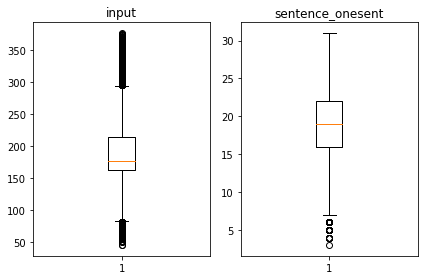

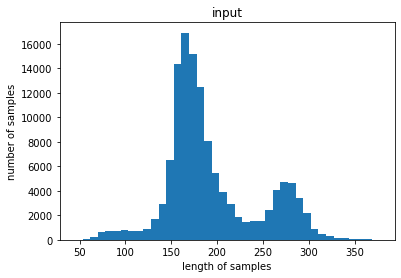

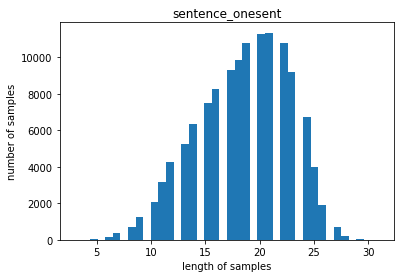

In [ ]:
# 데이터 분리를 위한 sample의 최대 길이 정하기

# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in train_1sent['input']]
headlines_len = [len(s.split()) for s in train_1sent['sentence_onesent']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('헤드라인의 최소 길이 : {}'.format(np.min(headlines_len)))
print('헤드라인의 최대 길이 : {}'.format(np.max(headlines_len)))
print('헤드라인의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('input')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('sentence_onesent')
plt.tight_layout()
plt.show()

plt.title('input')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('sentence_onesent')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 본문과 헤드라인의 길이 분포를 확인하고 적절한 max_len을 지정해야한다.

2~3 sent 요약
- Input 문자 길이의 평균은 191였고 대부분의 분포는 150 ~ 200사이에 있었다.
- 그러므로 encoder_max_length는 150 ~ 200이 적당할 것이다.
- sentence_sent_2 문자 길이의 평균은 40였고 대부분의 분포는 25 ~ 50사이에 있었다.
- 그러므로 decoder_max_length는 25 ~ 50이 적당할 것이다.

In [ ]:
# 빈 샘플이 있는지 재확인
# 전처리 후의 결과를 다시 데이터프레임에 저장
train_2_3sent['input']
train_2_3sent['sentence_sent_2']

# 빈 값은 ''으로 변환
train_2_3sent.replace('', np.nan, inplace=True)

텍스트의 최소 길이 : 45
텍스트의 최대 길이 : 377
텍스트의 평균 길이 : 191.24354707130038
헤드라인의 최소 길이 : 6
헤드라인의 최대 길이 : 190
헤드라인의 평균 길이 : 40.77436775983031


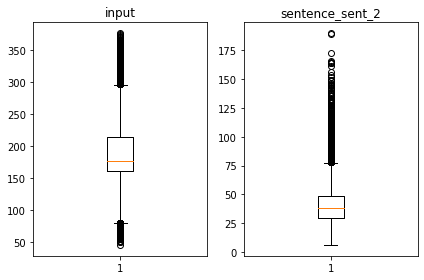

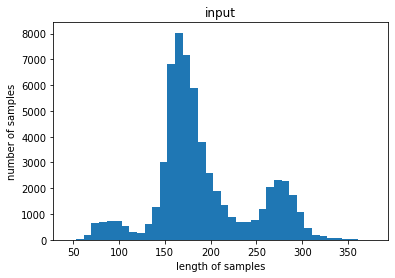

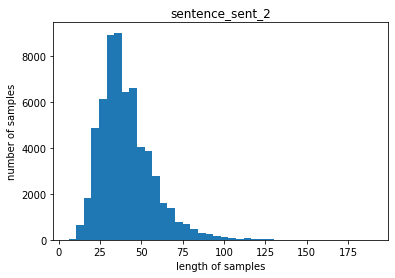

In [ ]:
# 데이터 분리를 위한 sample의 최대 길이 정하기

# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in train_2_3sent['input']]
headlines_len = [len(s.split()) for s in train_2_3sent['sentence_sent_2']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('헤드라인의 최소 길이 : {}'.format(np.min(headlines_len)))
print('헤드라인의 최대 길이 : {}'.format(np.max(headlines_len)))
print('헤드라인의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('input')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('sentence_sent_2')
plt.tight_layout()
plt.show()

plt.title('input')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('sentence_sent_2')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 본문과 헤드라인의 길이 분포를 확인하고 적절한 max_len을 지정해야한다.

20% Sent 요약
- Input 문자 길이의 평균은 190였고 대부분의 분포는 150 ~ 200사이에 있었다.
- 그러므로 encoder_max_length는 150 ~ 200이 적당할 것이다.
- sentence_per_20 문자 길이의 평균은 38였고 대부분의 분포는 25 ~ 50사이에 있었다.
- 그러므로 decoder_max_length는 25 ~ 50이 적당할 것이다.

In [ ]:
# 빈 샘플이 있는지 재확인
# 전처리 후의 결과를 다시 데이터프레임에 저장
train_20sent['input']
train_20sent['sentence_per_20']

# 빈 값은 ''으로 변환
train_20sent.replace('', np.nan, inplace=True)

텍스트의 최소 길이 : 46
텍스트의 최대 길이 : 401
텍스트의 평균 길이 : 190.2462720104588
헤드라인의 최소 길이 : 8
헤드라인의 최대 길이 : 111
헤드라인의 평균 길이 : 38.50057877463197


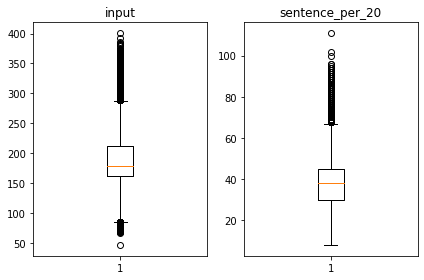

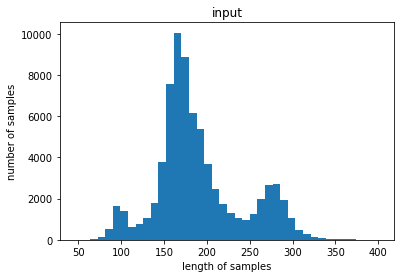

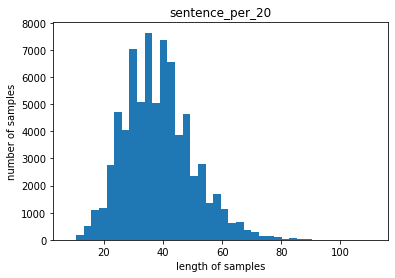

In [ ]:
# 데이터 분리를 위한 sample의 최대 길이 정하기

# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in train_20sent['input']]
headlines_len = [len(s.split()) for s in train_20sent['sentence_per_20']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('헤드라인의 최소 길이 : {}'.format(np.min(headlines_len)))
print('헤드라인의 최대 길이 : {}'.format(np.max(headlines_len)))
print('헤드라인의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('input')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('sentence_per_20')
plt.tight_layout()
plt.show()

plt.title('input')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('sentence_per_20')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 본문과 헤드라인의 길이 분포를 확인하고 적절한 max_len을 지정해야한다.